### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Laboratorio 01. Aprendizaje Estadistico
Santiago Orjuela

1006508118



# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


In [1]:
!pip install fitter -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 40.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
url_del_dataset = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'
df = pd.read_csv(url_del_dataset)
df.set_index('time', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [ ]:
df.isnull().sum()

,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0
Diff_Close,0
Diff_Open,0


In [ ]:
df.columns = ["".join([c.capitalize() for c in cols.split("_")]) for cols in df.columns]
dfnew = df.Close.to_frame()
dfnew.head()

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181


In [ ]:
dfnew['DiffPrice'] = dfnew.Close.diff(1)
dfnew.fillna(0, inplace=True)
dfnew.head()

,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,0.00000
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304


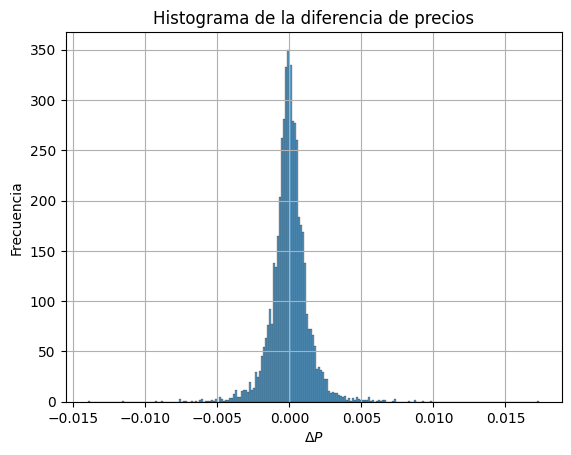

In [ ]:
sns.histplot(dfnew.DiffPrice)
plt.title('Histograma de la diferencia de precios')
plt.xlabel(r'$\Delta P$')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

{'johnsonsu': {'a': -0.020649555008380997,
  'b': 1.049520703155364,
  'loc': -1.5179836419355817e-05,
  'scale': 0.0008804059741908442}}

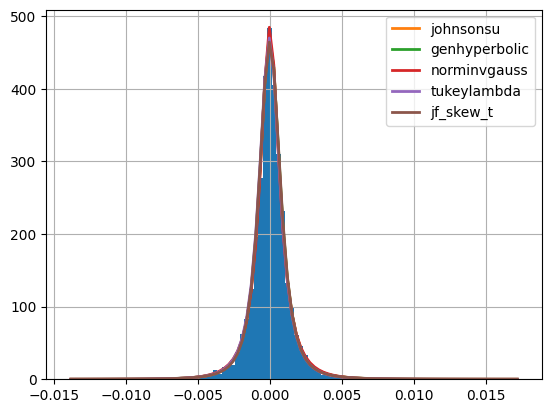

In [ ]:
f = Fitter(dfnew.DiffPrice,
           distributions=get_distributions())
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,1674.160558,9.862440,35.931213,inf,0.011121,0.562627
genhyperbolic,1838.616687,21.488148,54.074113,inf,0.011813,0.484254
norminvgauss,1945.226566,88.958421,115.027194,inf,0.009970,0.698959
tukeylambda,1999.209360,-5.882027,13.669552,inf,0.019893,0.037713
jf_skew_t,2118.463689,-54.436881,-28.368108,inf,0.012756,0.386794


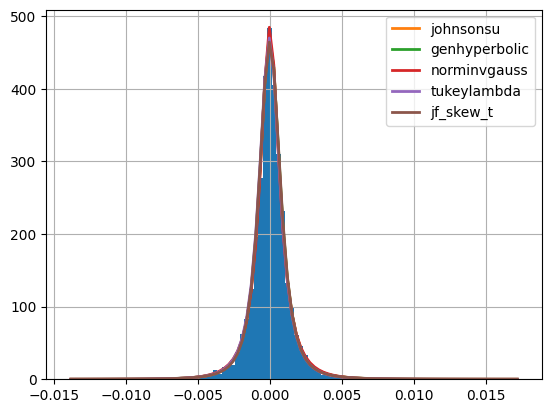

In [ ]:
f.summary()

In [ ]:
df2023 = dfnew[dfnew.index.year == 2023]
df2023.head()

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016


In [ ]:
freq = ['15D', '1W', '1M']

[print(f'Promedio de los Precios cada {f}: \
      {df2023.groupby(pd.Grouper(freq=f)).mean()}') for f in freq]

Promedio de los Precios cada 15D:                      Close  DiffPrice
time                           
2023-01-02  1.069361   0.000047
2023-01-17  1.085565   0.000015
2023-02-01  1.077679  -0.000066
2023-02-16  1.063150  -0.000034
2023-03-03  1.063186   0.000026
2023-03-18  1.080936   0.000074
2023-04-02  1.093090   0.000063
2023-04-17  1.099084  -0.000006
2023-05-02  1.098889  -0.000059
Promedio de los Precios cada 1W:                      Close  DiffPrice
time                           
2023-01-08  1.059972  -0.000047
2023-01-15  1.076002   0.000156
2023-01-22  1.082041   0.000020
2023-01-29  1.088414   0.000010
2023-02-05  1.089281  -0.000062
2023-02-12  1.073363  -0.000097
2023-02-19  1.069648   0.000014
2023-02-26  1.063374  -0.000124
2023-03-05  1.060854   0.000073
2023-03-12  1.060234   0.000004
2023-03-19  1.066518   0.000022
2023-03-26  1.077974   0.000079
2023-04-02  1.083874   0.000070
2023-04-09  1.090534   0.000047
2023-04-16  1.095646   0.000080
2023-04-23  1.096117  -0.

[None, None, None]

Histograma para cada Mes

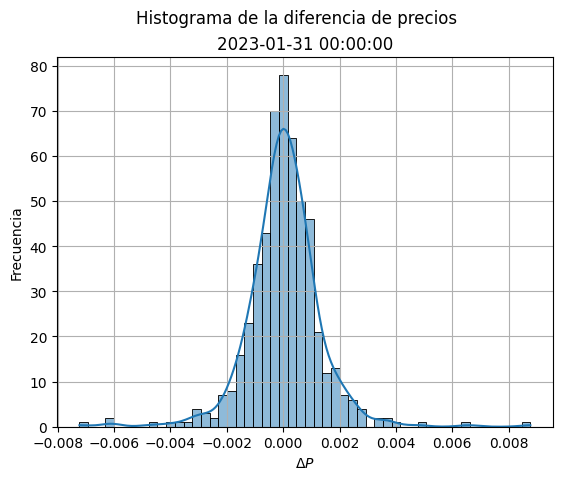

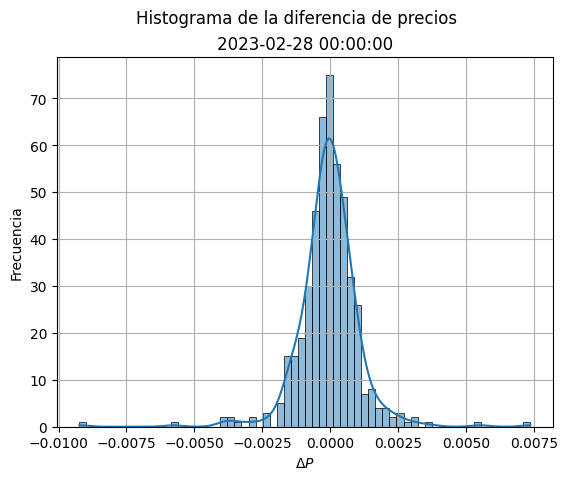

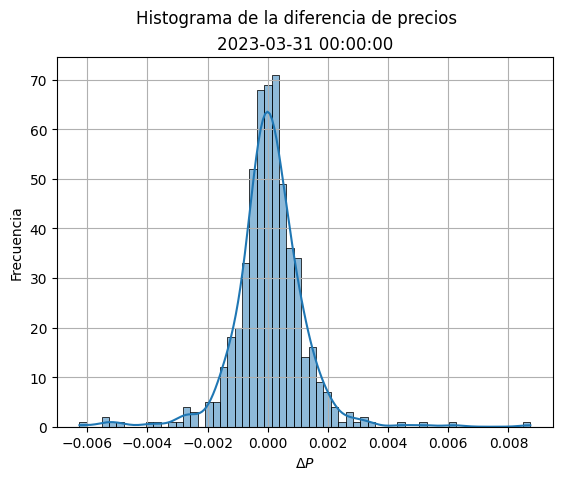

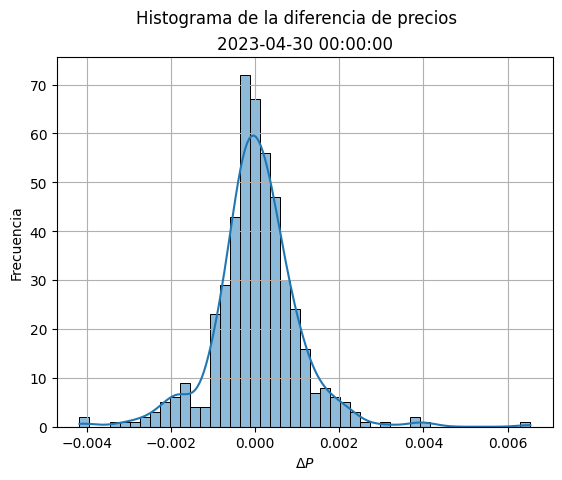

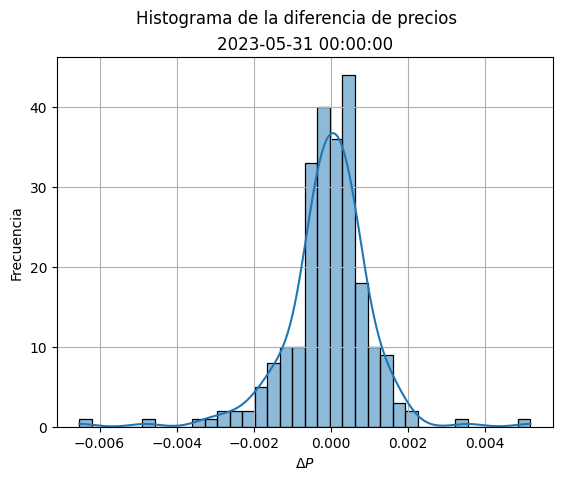

In [ ]:
dfmes = df2023.groupby(pd.Grouper(freq='1M'))

for name, group in dfmes:
  sns.histplot(group.DiffPrice, kde=True)
  plt.suptitle('Histograma de la diferencia de precios')
  plt.title(f'{name}')
  plt.xlabel(r'$\Delta P$')
  plt.ylabel('Frecuencia')
  plt.grid()
  plt.show()

### Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [3]:
!pip install ucimlrepo -q

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets.Diagnosis
data = pd.concat([X,y], axis=1)


data.columns = ["".join([c.capitalize() for c in cols.split("_")]) for cols in data.columns]
data.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
data.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [ ]:
data.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [ ]:
data.isnull().sum()

,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0
FractalDimension1,0


In [ ]:
data.Diagnosis.unique()

array(['M', 'B'], dtype=object)

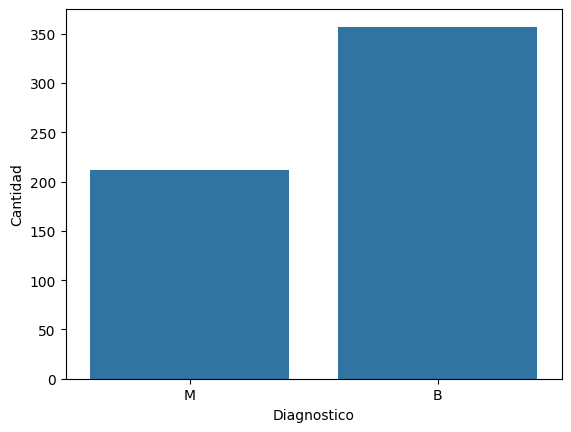

In [ ]:
sns.countplot(x=data.Diagnosis)
plt.ylabel('Cantidad')
plt.xlabel('Diagnostico')
plt.show()

In [5]:
data['DiagnosisNumeric'] = data.Diagnosis.map({'B':0, 'M':1})
data[['Diagnosis','DiagnosisNumeric']].head()

,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


In [6]:
data_norm = (data.drop(['Diagnosis', 'DiagnosisNumeric'], axis=1) - \
             data.drop(['Diagnosis', 'DiagnosisNumeric'], axis=1).mean()) /\
              data.drop('Diagnosis', axis=1).std()
data_norm = pd.concat([data_norm, data[['Diagnosis', 'DiagnosisNumeric']]], \
                      axis=1)
data_norm.head()

,Area1,Area2,Area3,Compactness1,Compactness2,Compactness3,ConcavePoints1,ConcavePoints2,ConcavePoints3,Concavity1,...,Smoothness2,Smoothness3,Symmetry1,Symmetry2,Symmetry3,Texture1,Texture2,Texture3,Diagnosis,DiagnosisNumeric
0,0.983510,2.485391,1.999478,3.280628,1.315704,2.614365,2.530249,0.660239,2.294058,2.650542,...,-0.213814,1.306537,2.215566,1.147747,2.748204,-2.071512,-0.564768,-1.358098,M,1
1,1.907030,0.741749,1.888827,-0.486643,-0.692317,-0.430066,0.547662,0.259933,1.086129,-0.023825,...,-0.604819,-0.375282,0.001391,-0.804742,-0.243675,-0.353322,-0.875473,-0.368879,M,1
2,1.557513,1.180298,1.455004,1.052000,0.814257,1.081980,2.035440,1.423575,1.953282,1.362280,...,-0.296744,0.526944,0.938859,0.236827,1.151242,0.455786,-0.779398,-0.023953,M,1
3,-0.763792,-0.288125,-0.549538,3.399917,2.741868,3.889975,1.450431,1.114027,2.173873,1.914213,...,0.689095,3.391291,2.864862,4.728520,6.040726,0.253509,-0.110312,0.133866,M,1
4,1.824624,1.189310,1.219651,0.538866,-0.048477,-0.313119,1.427237,1.143199,0.728618,1.369806,...,1.481763,0.220362,-0.009552,-0.360775,-0.867590,-1.150804,-0.789549,-1.465481,M,1


In [7]:
cols = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
for i in cols:
  data_norm[i] = data_norm[[col for col in data_norm.columns \
                            if col.startswith(i[:-5])]].mean(axis=1)
data_norm[cols].head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272


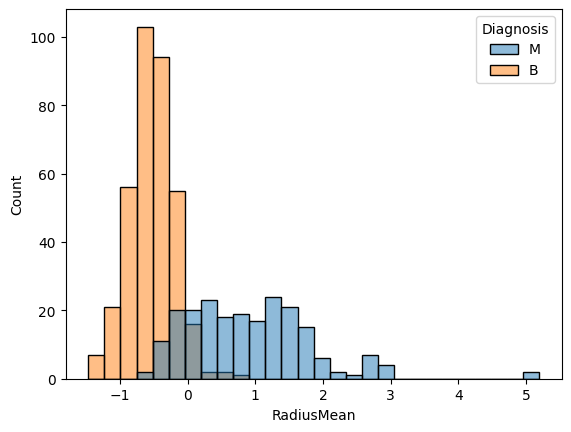

In [ ]:
sns.histplot(data=data_norm, x='RadiusMean',  hue='Diagnosis')
plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

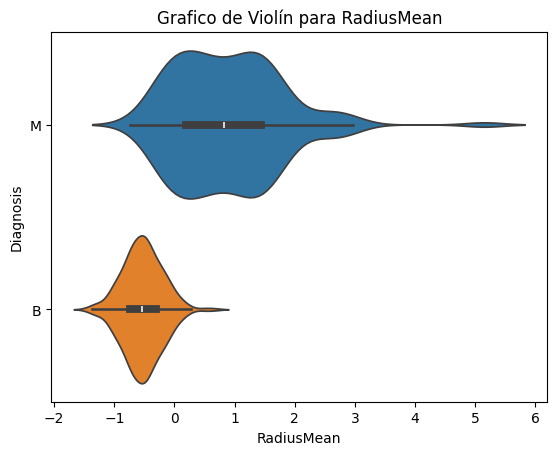

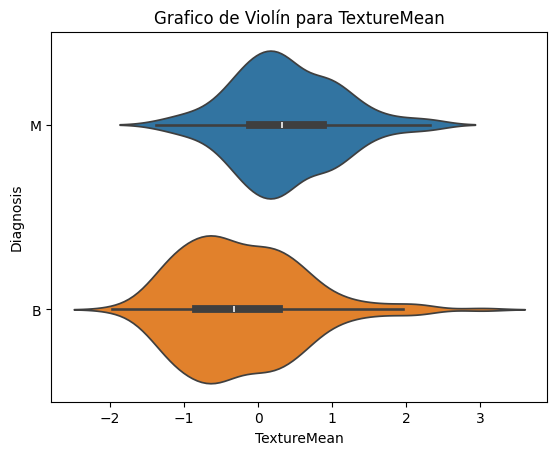

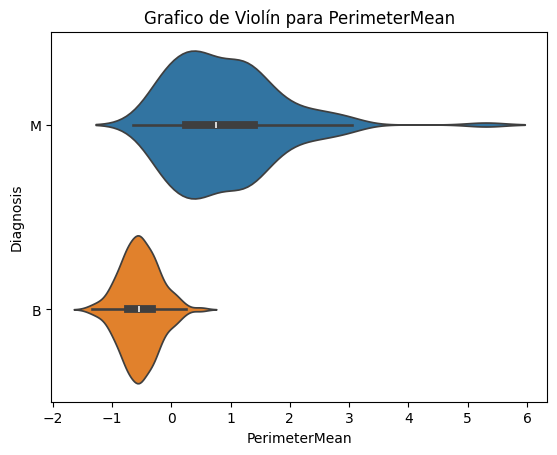

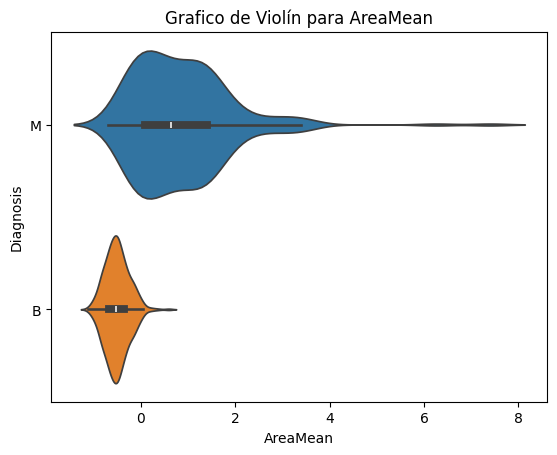

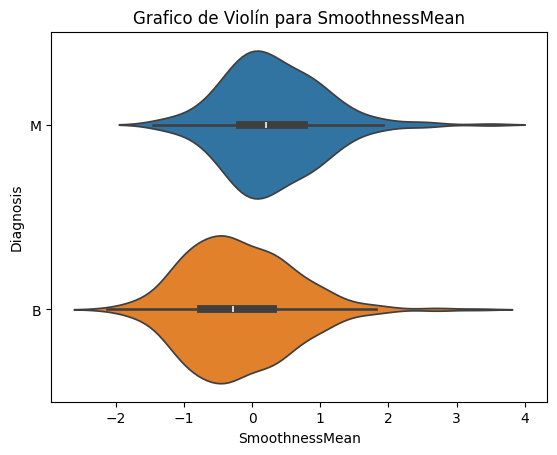

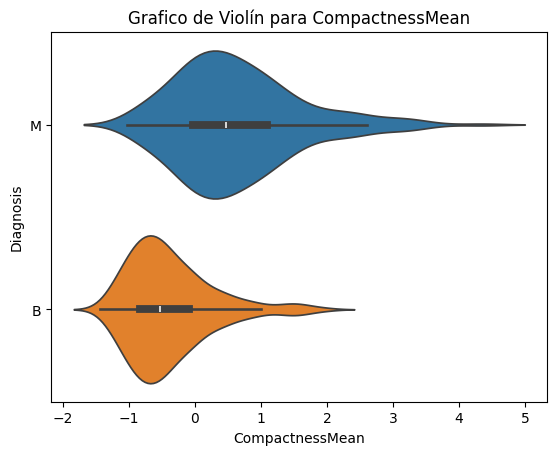

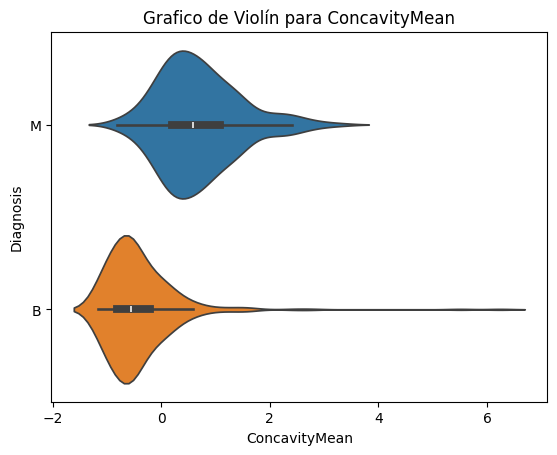

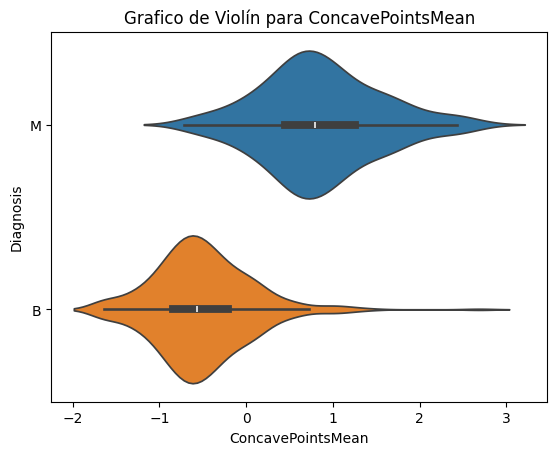

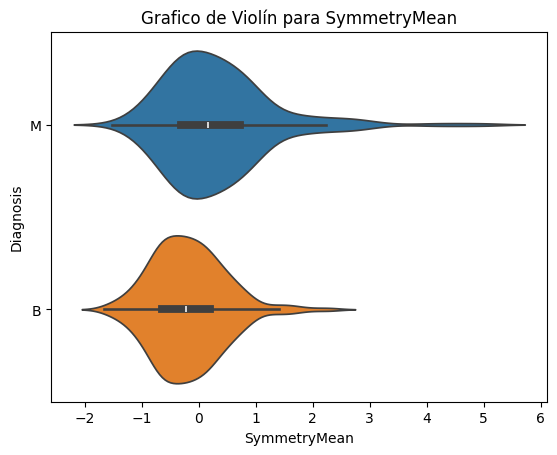

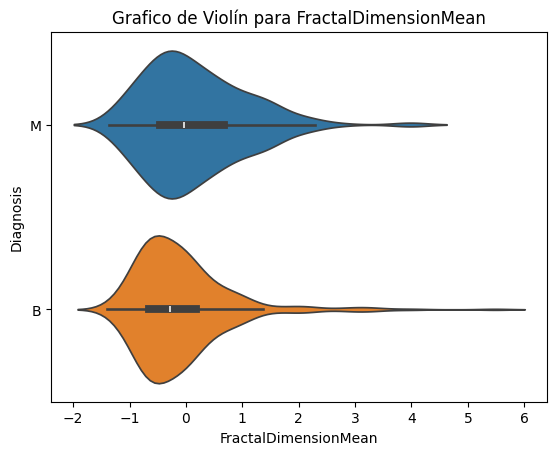

In [ ]:
for word in cols:
  sns.violinplot(data= data_norm, x=word, y='Diagnosis', hue='Diagnosis')
  plt.title(f'Grafico de Violín para {word}')
  plt.show()

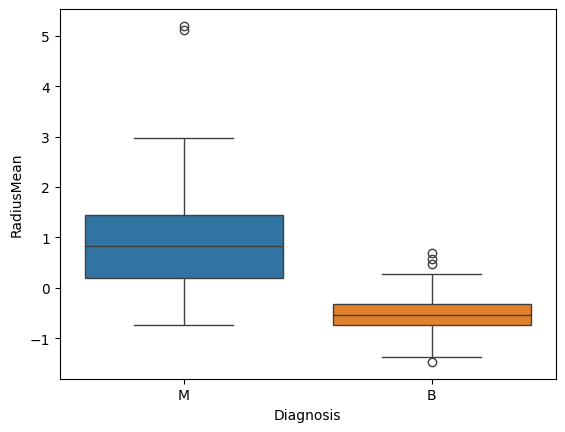

In [ ]:
sns.boxplot(data=data_norm, x='Diagnosis', y='RadiusMean', hue='Diagnosis')
plt.show()

In [8]:
#Elimina los outliers de RadiusMean
Q1 = data_norm['RadiusMean'].quantile(0.30)
Q3 = data_norm['RadiusMean'].quantile(0.70)
IQR = Q3 - Q1
data_normq = data_norm[~((data_norm['RadiusMean'] < (Q1 - 1.5 * IQR)) | (data_norm['RadiusMean'] > (Q3 + 1.5 * IQR)))]

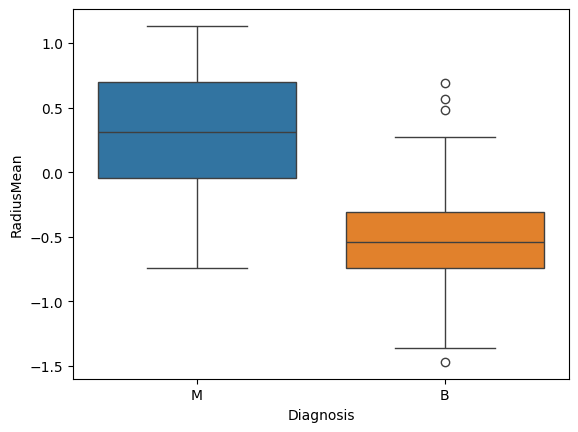

In [ ]:
sns.boxplot(data=data_normq, x='Diagnosis', y='RadiusMean', hue='Diagnosis')
plt.show()

In [9]:
data_normq.drop('Diagnosis', axis=1, inplace=True)
corr = data_normq.corr()

<ipython-input-9-d6f0ab863003>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normq.drop('Diagnosis', axis=1, inplace=True)


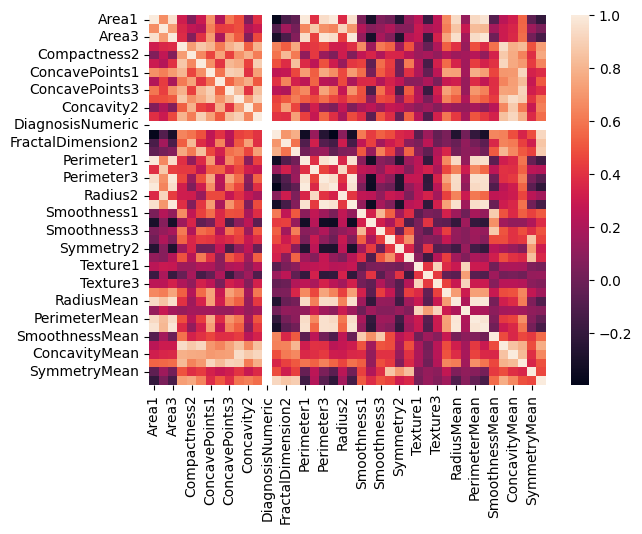

In [ ]:
sns.heatmap(corr)
plt.show()